In [ ]:
from keras.layers import Input, Dense, LeakyReLU, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:] / 255

In [4]:
def get_adam():
    return Adam(lr=.0001, beta_1=.9)

In [5]:
def get_generator():
    adam = get_adam()
    model = Sequential()
    model.add(Dense(128, input_dim=50))
    model.add(LeakyReLU(.2))
    model.add(Dense(256))
    model.add(LeakyReLU(.2))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(LeakyReLU(.2))
    model.add(Dropout(0.5))
    model.add(Dense(1024))
    model.add(LeakyReLU(.2))
    model.add(Dense(784, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer=adam)
    
    return model

In [6]:
gen = get_generator()
gen.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               6528      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)      

In [7]:
def get_discriminator():
    adam = get_adam()
    model = Sequential()
    model.add(Dense(1024, input_dim=784))
    model.add(LeakyReLU(.2))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(LeakyReLU(.2))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(LeakyReLU(.2))
    model.add(Dense(128))
    model.add(LeakyReLU(.2))
    model.add(Dense(32))
    model.add(LeakyReLU(.2))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer=adam)
    
    return model

In [8]:
def get_gan(generator, discriminator):
    adam = get_adam()
    in_gan = Input(shape=(50,))
    layer_1 = generator(in_gan)
    out_gan = discriminator(layer_1)
    
    model = Model(inputs=[in_gan], outputs=[out_gan])
    model.compile(loss="binary_crossentropy", optimizer=adam)
    
    return model
    

In [9]:
generator = get_generator()
discriminator = get_discriminator()
gan = get_gan(generator, discriminator)
batch_size = 2000

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoches done 0


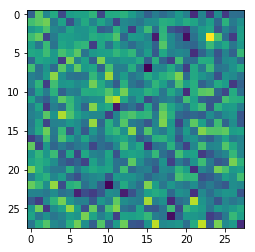

epoches done 1


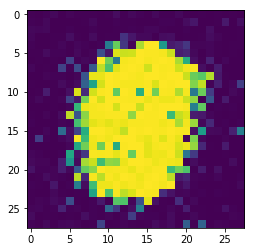

epoches done 2


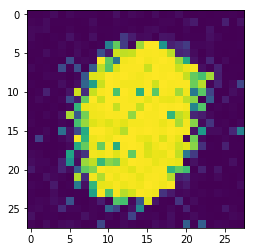

epoches done 3


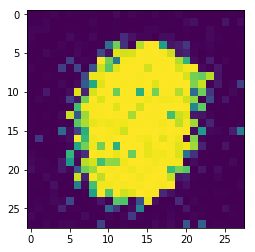

epoches done 4


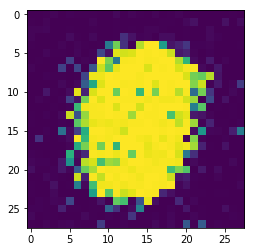

epoches done 5


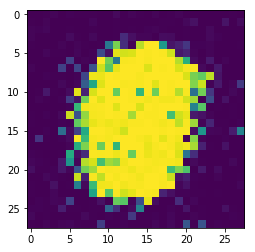

epoches done 6


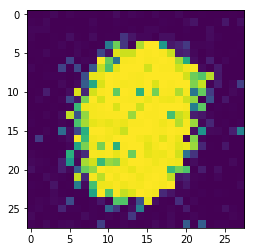

epoches done 7


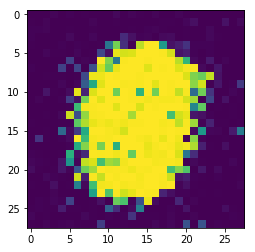

epoches done 8


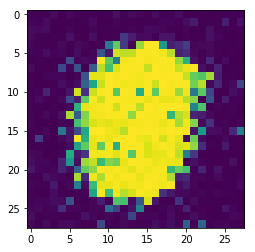

epoches done 9


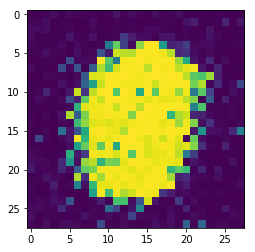

epoches done 10


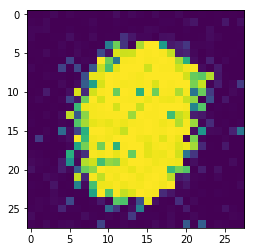

epoches done 11


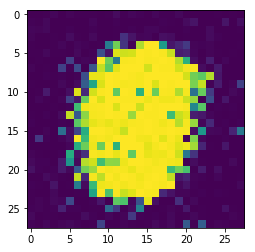

epoches done 12


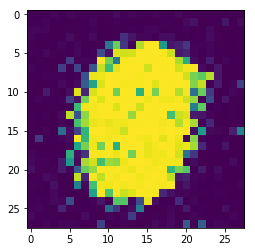

epoches done 13


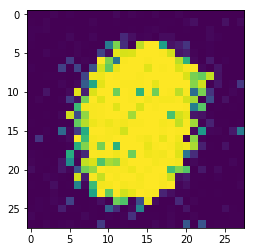

epoches done 14


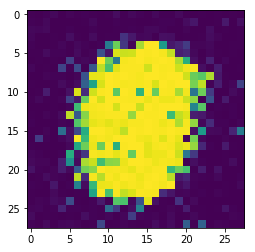

epoches done 15


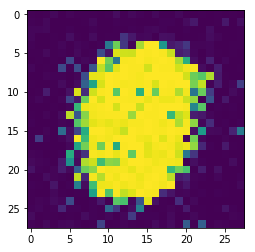

epoches done 16


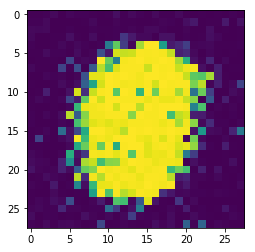

epoches done 17


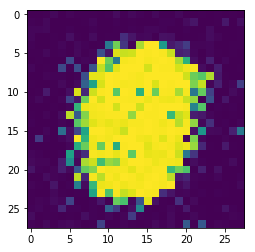

epoches done 18


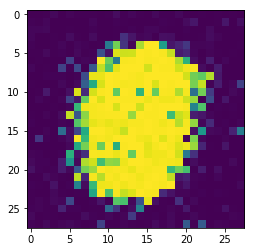

epoches done 19


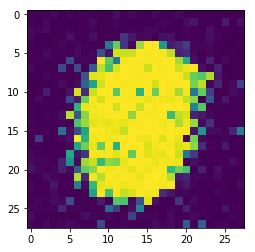

In [10]:
for i in range(100):
    reals = X[np.random.randint(0, len(X), batch_size)]
    noises = np.random.uniform(size=(batch_size, 50))
    
    fakes = generator.predict(noises)
    
    total = np.vstack([reals, fakes])
    y = np.zeros([2*batch_size, 1])
    y[: batch_size] = 1
    
    discriminator.trainable = True
    
    discriminator.fit(total, y, verbose=0)

    discriminator.trainable = False
    
    gan.fit(noises, np.ones([batch_size, 1]), verbose=0)
    
    if i%5== 0:
        print("epoches done", i//5)
        plt.figure()
        plt.imshow(fakes[0].reshape(28, 28))
        plt.show()
        
    


In [ ]:
noises = np.random.uniform(size=(10, 50))

In [ ]:
fakes = generator.predict(noises)

In [ ]:
! push "l 23"